# NLE Coursework 1
---


In [1]:
import sys
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from collections import defaultdict,Counter
from itertools import zip_longest
from IPython.display import display
from random import seed
get_ipython().magic('matplotlib inline')
import random
import math
import matplotlib.pylab as pylab
%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
from pylab import rcParams
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import csv

## Section 1 
### 1.1
To investigate the difference in classifiers' performance, I ran both of them on some fixed amount of training and testing data (70% of overall data used for training, 30% for testing) and calculated the average accuracy across multiple runs.

This is test run number 1


,Classifier,Accuracy
0,Word List,0.628333
1,NB,0.783333


This is test run number 2


,Classifier,Accuracy
0,Word List,0.615000
1,NB,0.761667


This is test run number 3


,Classifier,Accuracy
0,Word List,0.618333
1,NB,0.801667


This is test run number 4


,Classifier,Accuracy
0,Word List,0.638333
1,NB,0.758333


This is test run number 5


,Classifier,Accuracy
0,Word List,0.625000
1,NB,0.766667


This is test run number 6


,Classifier,Accuracy
0,Word List,0.630
1,NB,0.805


This is test run number 7


,Classifier,Accuracy
0,Word List,0.638333
1,NB,0.806667


This is test run number 8


,Classifier,Accuracy
0,Word List,0.643333
1,NB,0.793333


This is test run number 9


,Classifier,Accuracy
0,Word List,0.653333
1,NB,0.811667


This is test run number 10


,Classifier,Accuracy
0,Word List,0.645000
1,NB,0.813333


-----------------


,Classifier,Average
0,Word List,0.633500
1,NB,0.790167


(0.0, 1.0)

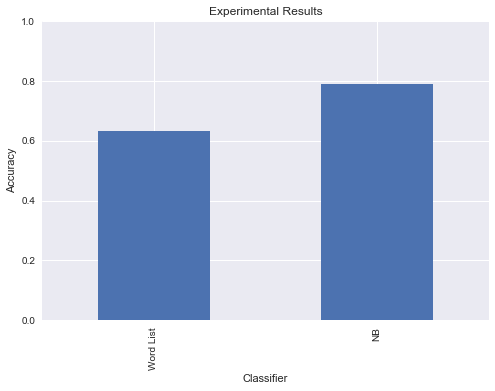

In [3]:
from classification_utils import *

reader = AmazonReviewCorpusReader().category("dvd")
word_list_size = 100
repetitions = 10
WL_accuracy_total = 0
NB_accuracy_total = 0

for i in range(repetitions):
    pos_train, neg_train, pos_test, neg_test = get_train_test_data(reader)
    WL_current_accuracy = run_WL(pos_train, neg_train, pos_test, neg_test, word_list_size)
    NB_current_accuracy = run_NB(pos_train, neg_train, pos_test, neg_test)
    WL_accuracy_total += WL_current_accuracy
    NB_accuracy_total += NB_current_accuracy
    print("This is test run number", i+1)
    df1 = pd.DataFrame([("Word List", WL_current_accuracy), ("NB", NB_current_accuracy)], columns = ["Classifier", "Accuracy"])
    display(df1)
WL_accuracy = WL_accuracy_total/repetitions
NB_accuracy = NB_accuracy_total/repetitions

print("-----------------")
df2 = pd.DataFrame([("Word List", WL_accuracy), ("NB", NB_accuracy)], columns = ["Classifier", "Average"])
display(df2)
ax = df2.plot.bar(title = "Experimental Results", legend = False, x = 0)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Classifier")
ax.set_ylim(0.0, 1.0)